In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt    
import plotly.express as px
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro, ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Exploratory data analysis

In [2]:
#read data
data=pd.read_csv("PEA07.csv")

In [3]:
data

,Statistic Label,Age Group,Sex,Regional Authority Area,Year,UNIT,VALUE
0,Estimated Population (Persons in April),0 - 4 years,Male,Border,1996,Thousand,11.9
1,Estimated Population (Persons in April),0 - 4 years,Male,Border,1997,Thousand,13.9
2,Estimated Population (Persons in April),0 - 4 years,Male,Border,1998,Thousand,14.1
3,Estimated Population (Persons in April),0 - 4 years,Male,Border,1999,Thousand,14.5
4,Estimated Population (Persons in April),0 - 4 years,Male,Border,2000,Thousand,15.2
...,...,...,...,...,...,...,...
6331,Estimated Population (Persons in April),85 years and over,Female,South-West,2013,Thousand,6.3
6332,Estimated Population (Persons in April),85 years and over,Female,South-West,2014,Thousand,6.5
6333,Estimated Population (Persons in April),85 years and over,Female,South-West,2015,Thousand,6.7
6334,Estimated Population (Persons in April),85 years and over,Female,South-West,2016,Thousand,6.8


In [4]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          6336 non-null   object 
 1   Age Group                6336 non-null   object 
 2   Sex                      6336 non-null   object 
 3   Regional Authority Area  6336 non-null   object 
 4   Year                     6336 non-null   int64  
 5   UNIT                     6336 non-null   object 
 6   VALUE                    6336 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 346.6+ KB


In [5]:
#basic statistics
data.describe()

,Year,VALUE
count,6336.000000,6336.000000
mean,2006.500000,14.722696
std,6.344789,10.570413
min,1996.000000,0.600000
25%,2001.000000,7.800000
50%,2006.500000,13.200000
75%,2012.000000,17.800000
max,2017.000000,74.400000


In [6]:
#changes column names
data = data.rename(columns={'Age Group': 'age_group', 'VALUE': 'value', 'Regional Authority Area': 'regional_aut_area'})

In [7]:
#data types of columns
data.dtypes

Statistic Label       object
age_group             object
Sex                   object
regional_aut_area     object
Year                   int64
UNIT                  object
value                float64
dtype: object

In [8]:
#size of data frame
data.shape

(6336, 7)

In [9]:
#number of occupied values in the column
data.count()

Statistic Label      6336
age_group            6336
Sex                  6336
regional_aut_area    6336
Year                 6336
UNIT                 6336
value                6336
dtype: int64

In [10]:
data.isnull().sum()

Statistic Label      0
age_group            0
Sex                  0
regional_aut_area    0
Year                 0
UNIT                 0
value                0
dtype: int64

In [11]:
#First 10 data
data.head(10)

,Statistic Label,age_group,Sex,regional_aut_area,Year,UNIT,value
0,Estimated Population (Persons in April),0 - 4 years,Male,Border,1996,Thousand,11.9
1,Estimated Population (Persons in April),0 - 4 years,Male,Border,1997,Thousand,13.9
2,Estimated Population (Persons in April),0 - 4 years,Male,Border,1998,Thousand,14.1
3,Estimated Population (Persons in April),0 - 4 years,Male,Border,1999,Thousand,14.5
4,Estimated Population (Persons in April),0 - 4 years,Male,Border,2000,Thousand,15.2
5,Estimated Population (Persons in April),0 - 4 years,Male,Border,2001,Thousand,15.4
6,Estimated Population (Persons in April),0 - 4 years,Male,Border,2002,Thousand,16.5
7,Estimated Population (Persons in April),0 - 4 years,Male,Border,2003,Thousand,16.5
8,Estimated Population (Persons in April),0 - 4 years,Male,Border,2004,Thousand,16.7
9,Estimated Population (Persons in April),0 - 4 years,Male,Border,2005,Thousand,17.2


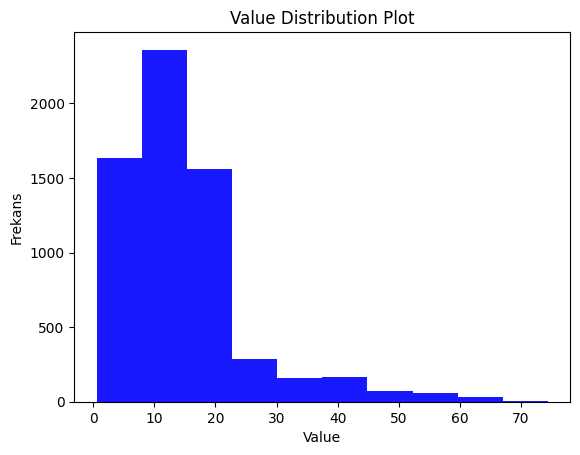

In [12]:
#Scatter Plot of Value
value = data['value']

# Histogram plot
plt.hist(value, bins=10, color='blue', alpha=0.9)
plt.xlabel('Value')
plt.ylabel('Frekans')
plt.title('Value Distribution Plot')
plt.show()

<Axes: xlabel='value'>

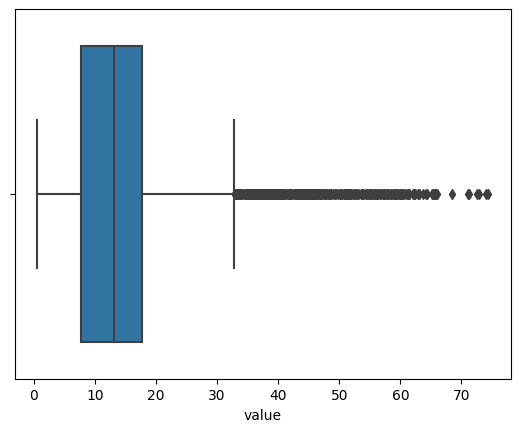

In [13]:
#Density representation of value variable
sns.boxplot(x=data["value"])

In [14]:
#Calculate mean
mean= data['value'].mean()
mean

14.722695707070708

In [15]:
#Calculate mode
mode = data['value'].mode()
mode

0    12.7
1    13.6
Name: value, dtype: float64

In [16]:
# Calculate the skewness and kurtosis values of the 'value' variable
value_skewness = skew(data['value'])
value_kurtosis = kurtosis(data['value'])

print(f"'value' Skewness for Variable: {value_skewness}")
print(f"'value' Kurtosis for Variable: {value_kurtosis}")

'value' Skewness for Variable: 1.9413659119869444
'value' Kurtosis for Variable: 5.095203735593223


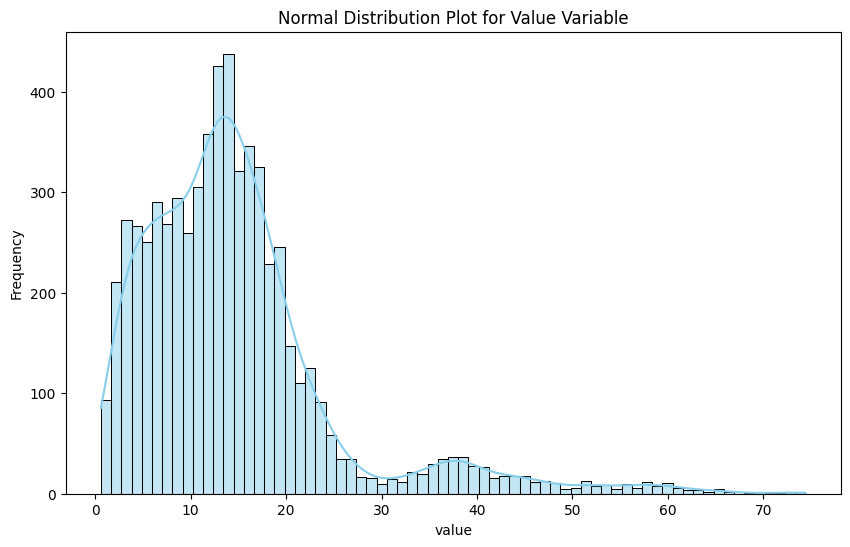

In [17]:
# Draw a normal distribution plot for variable 'value'
plt.figure(figsize=(10, 6))
sns.histplot(data['value'], kde=True, color='skyblue')
plt.title('Normal Distribution Plot for Value Variable')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Show categorical values of variable 'value'
value_counts = data['Sex'].value_counts()

print("Categorical Values:")
print(value_counts)

Categorical Values:
Sex
Male      3168
Female    3168
Name: count, dtype: int64


In [19]:
# Calculate the sum of variable 'Sex' and variable 'value' based on year
grouped_data = data.groupby(['Sex', 'Year'])['value'].sum().unstack()

print("Total Values Based on Gender and Year:")
grouped_data

Total Values Based on Gender and Year:


Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Sex,,,,,,,,,,,,,,,,,,,,,
Female,1826.0,1845.1,1864.8,1883.3,1906.6,1934.4,1970.8,2003.2,2033.9,2071.4,...,2246.5,2275.9,2292.8,2304.8,2319.2,2328.6,2346.8,2370.3,2393.1,2420.6
Male,1800.6,1819.6,1839.0,1859.4,1883.2,1913.3,1946.6,1977.1,2011.2,2061.5,...,2238.6,2257.3,2262.3,2270.5,2274.7,2285.9,2298.7,2317.2,2346.4,2372.0


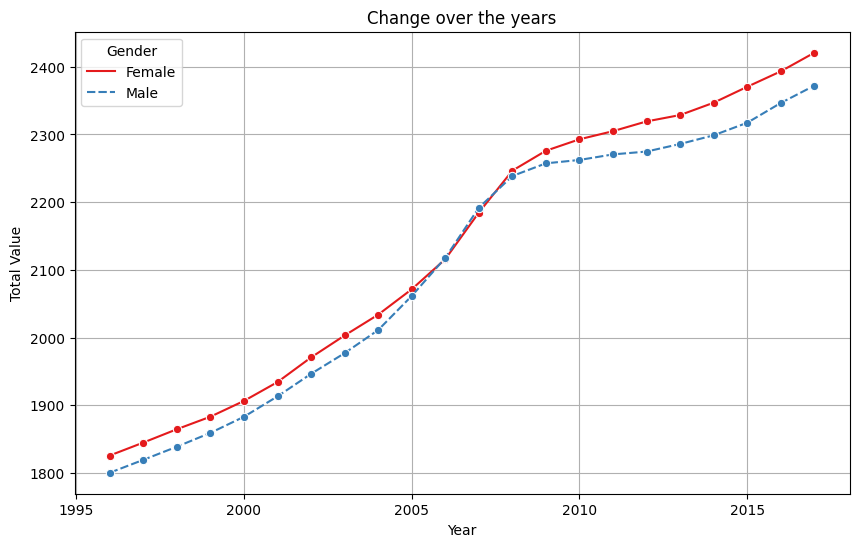

In [20]:
# Calculate the sum of variable 'Sex' and variable 'value' based on year
grouped_data = data.groupby(['Sex', 'Year'])['value'].sum().unstack()

# Graphic drawing
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data.T, marker='o', palette='Set1')

# Graphics settings
plt.title('Change over the years')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend(title='Gender', loc='upper left')
plt.grid(True)
plt.show()

In [21]:
# Calculate the sum of variable 'value' based on variable 'Sex'
sex_value_totals = data.groupby('Sex')['value'].count()

print("Total Values by Gender:")
print(sex_value_totals)

Total Values by Gender:
Sex
Female    3168
Male      3168
Name: value, dtype: int64


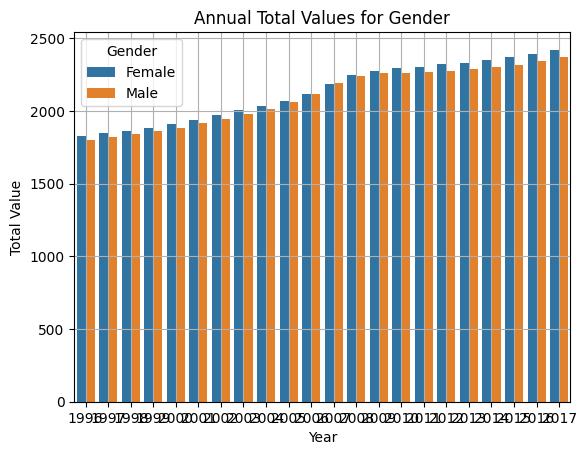

In [22]:
# Calculate the sum of variable 'Sex' and variable 'value' based on year
grouped_data = data.groupby(['Sex', 'Year'])['value'].sum().reset_index()

# Show yearly totals by gender
sns.barplot(x='Year', y='value', hue='Sex', data=grouped_data)

# Graphics settings
plt.title('Annual Total Values for Gender')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

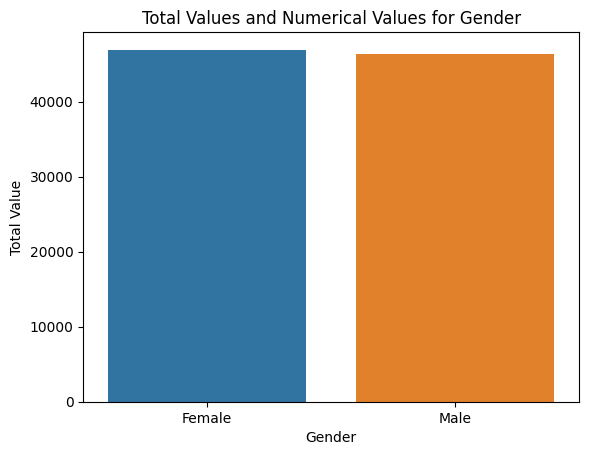

Numeric Values:
   Gender  Total Value  Count of Data
0  Female      46938.5           3168
1    Male      46344.5           3168


In [23]:
# Calculate the sum of variable 'value' and numerical values based on variable 'Sex'
sex_value_totals = data.groupby('Sex')['value'].agg(['sum', 'count']).reset_index()

# Show total values for genders
sns.barplot(x='Sex', y='sum', data=sex_value_totals)

# Create a table showing numeric values
table = pd.DataFrame({
     'Gender': sex_value_totals['Sex'],
     'Total Value': sex_value_totals['sum'],
     'Count of Data': sex_value_totals['count']
})

# Graphics settings
plt.title('Total Values and Numerical Values for Gender')
plt.xlabel('Gender')
plt.ylabel('Total Value')
plt.show()

# Show table containing numeric values
print("Numeric Values:")
print(table)


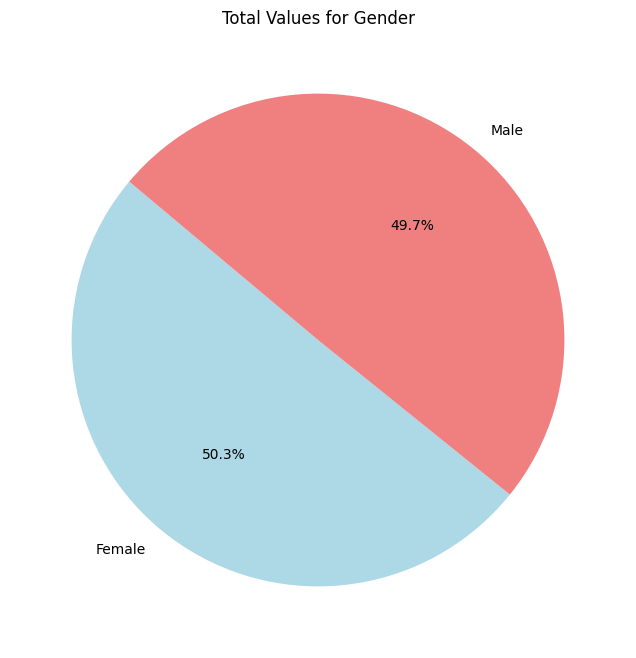

In [24]:
# Calculate the sum of variable 'value' and numerical values based on variable 'Sex'
sex_value_totals = data.groupby('Sex')['value'].agg(['sum', 'count']).reset_index()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_value_totals['sum'], labels=sex_value_totals['Sex'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Total Values for Gender')

plt.show()

In [25]:
population_rate= data.groupby('Year')['value'].sum()
population_rate

Year
1996    3626.6
1997    3664.7
1998    3703.8
1999    3742.7
2000    3789.8
2001    3847.7
2002    3917.4
2003    3980.3
2004    4045.1
2005    4132.9
2006    4233.5
2007    4376.3
2008    4485.1
2009    4533.2
2010    4555.1
2011    4575.3
2012    4593.9
2013    4614.5
2014    4645.5
2015    4687.5
2016    4739.5
2017    4792.6
Name: value, dtype: float64

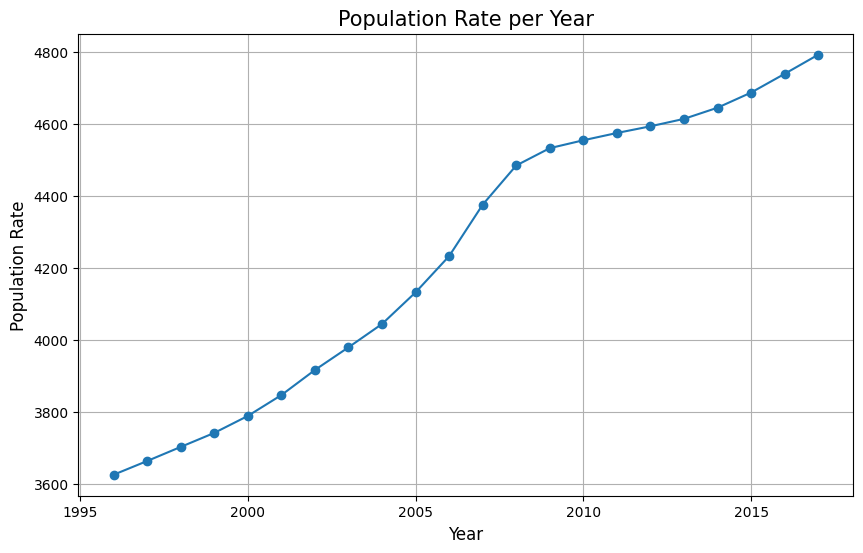

In [26]:
#Plot Population Rate per Year
population_rate = data.groupby('Year')['value'].sum()

plt.figure(figsize=(10, 6))
population_rate.plot(kind='line', marker='o')
plt.title('Population Rate per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population Rate', fontsize=12)
plt.grid()
plt.show()

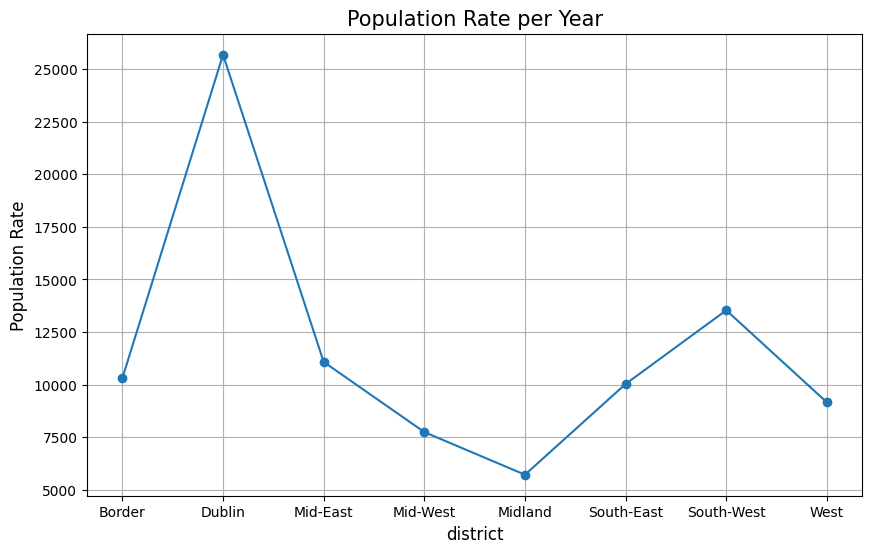

In [27]:
#show Population Rate per Year
population_rate = data.groupby('regional_aut_area')['value'].sum()

plt.figure(figsize=(10, 6))
population_rate.plot(kind='line', marker='o')
plt.title('Population Rate per Year', fontsize=15)
plt.xlabel('district', fontsize=12)
plt.ylabel('Population Rate', fontsize=12)
plt.grid()
plt.show()

In [28]:
data.columns

Index(['Statistic Label', 'age_group', 'Sex', 'regional_aut_area', 'Year',
       'UNIT', 'value'],
      dtype='object')

#### Normal Distribution 

In [29]:
# Display the mean values by group
mean_by_sex = data.groupby('Sex')['value'].mean()
print(mean_by_sex)

Sex
Female    14.816446
Male      14.628946
Name: value, dtype: float64


In [30]:
# Calculating the standard deviation of a group (e.g., 'Sex')
std_by_sex = data.groupby('Sex')['value'].std()

# Display the standard deviation values by group
print(std_by_sex)


Sex
Female    10.545114
Male      10.596486
Name: value, dtype: float64


In [31]:
# Sample data for male population
male_data = data.loc[data['Sex'] == 'Male', 'value']

# Sample data for female population
female_data = data.loc[data['Sex'] == 'Female', 'value']

# Shapiro-Wilk test
shapiro_test_male = shapiro(male_data)
shapiro_test_female = shapiro(female_data)

# Kolmogorov-Smirnov test
ks_test = ks_2samp(male_data, female_data)

# Print results
print("Shapiro-Wilk Test (Male): p-value =", shapiro_test_male)
print("Shapiro-Wilk Test (Female): p-value =", shapiro_test_female)
print("\nKolmogorov-Smirnov Test: p-value =", ks_test)

Shapiro-Wilk Test (Male): p-value = ShapiroResult(statistic=0.8479622602462769, pvalue=0.0)
Shapiro-Wilk Test (Female): p-value = ShapiroResult(statistic=0.8138037323951721, pvalue=0.0)

Kolmogorov-Smirnov Test: p-value = KstestResult(statistic=0.06029040404040404, pvalue=1.984644036568823e-05, statistic_location=3.4, statistic_sign=1)


In [32]:
data.columns

Index(['Statistic Label', 'age_group', 'Sex', 'regional_aut_area', 'Year',
       'UNIT', 'value'],
      dtype='object')

# Correlation

In [33]:
# Choose Using features
data= data[['age_group', 'Sex', 'regional_aut_area', 'Year','value']]
data

,age_group,Sex,regional_aut_area,Year,value
0,0 - 4 years,Male,Border,1996,11.9
1,0 - 4 years,Male,Border,1997,13.9
2,0 - 4 years,Male,Border,1998,14.1
3,0 - 4 years,Male,Border,1999,14.5
4,0 - 4 years,Male,Border,2000,15.2
...,...,...,...,...,...
6331,85 years and over,Female,South-West,2013,6.3
6332,85 years and over,Female,South-West,2014,6.5
6333,85 years and over,Female,South-West,2015,6.7
6334,85 years and over,Female,South-West,2016,6.8


In [34]:
##Converting a variable into an integer
data['New_sex'] = data['Sex'].map({'Male': 0, 'Female': 1 })
data

,age_group,Sex,regional_aut_area,Year,value,New_sex
0,0 - 4 years,Male,Border,1996,11.9,0
1,0 - 4 years,Male,Border,1997,13.9,0
2,0 - 4 years,Male,Border,1998,14.1,0
3,0 - 4 years,Male,Border,1999,14.5,0
4,0 - 4 years,Male,Border,2000,15.2,0
...,...,...,...,...,...,...
6331,85 years and over,Female,South-West,2013,6.3,1
6332,85 years and over,Female,South-West,2014,6.5,1
6333,85 years and over,Female,South-West,2015,6.7,1
6334,85 years and over,Female,South-West,2016,6.8,1


In [35]:
# turn the Age Group variable into an integer by assigning it to a new variable
data['new_age_group'] = data['age_group'].map({'0 - 4 years': 0, '10 - 14 years': 1, '15 - 19 years': 2, '20 - 24 years': 3, '25 - 29 years': 4, '30 - 34 years': 5
                                                , '35 - 39 years': 6, '40 - 44 years': 7, '45 - 49 years': 8
                                                ,'5 - 9 years': 9, '50 - 54 years': 10, '55 - 59 years': 11
                                                , '60 - 64 years': 12, '65 - 69 years': 13, '70 - 74 years': 14
                                              ,'75 - 79 years': 15, '80 - 84 years': 16, '85 years and over': 17})
data

,age_group,Sex,regional_aut_area,Year,value,New_sex,new_age_group
0,0 - 4 years,Male,Border,1996,11.9,0,0
1,0 - 4 years,Male,Border,1997,13.9,0,0
2,0 - 4 years,Male,Border,1998,14.1,0,0
3,0 - 4 years,Male,Border,1999,14.5,0,0
4,0 - 4 years,Male,Border,2000,15.2,0,0
...,...,...,...,...,...,...,...
6331,85 years and over,Female,South-West,2013,6.3,1,17
6332,85 years and over,Female,South-West,2014,6.5,1,17
6333,85 years and over,Female,South-West,2015,6.7,1,17
6334,85 years and over,Female,South-West,2016,6.8,1,17


In [36]:
# Show categorical values within the variable
category_values = data['regional_aut_area'].value_counts()

print("Categorical Values in Variable:")
print(category_values)

Categorical Values in Variable:
regional_aut_area
Border        792
Midland       792
West          792
Dublin        792
Mid-East      792
Mid-West      792
South-East    792
South-West    792
Name: count, dtype: int64


In [37]:
# turn the Age Group variable into an integer by assigning it to a new variable
data['new_regional_aut_area'] = data['regional_aut_area'].map({'Border': 0, 'Midland': 1, 'West': 2, 'Dublin': 3
                                                               , 'Mid-East': 4, 'Mid-West': 6, 'South-East': 7, 'South-West': 8})
data

,age_group,Sex,regional_aut_area,Year,value,New_sex,new_age_group,new_regional_aut_area
0,0 - 4 years,Male,Border,1996,11.9,0,0,0
1,0 - 4 years,Male,Border,1997,13.9,0,0,0
2,0 - 4 years,Male,Border,1998,14.1,0,0,0
3,0 - 4 years,Male,Border,1999,14.5,0,0,0
4,0 - 4 years,Male,Border,2000,15.2,0,0,0
...,...,...,...,...,...,...,...,...
6331,85 years and over,Female,South-West,2013,6.3,1,17,8
6332,85 years and over,Female,South-West,2014,6.5,1,17,8
6333,85 years and over,Female,South-West,2015,6.7,1,17,8
6334,85 years and over,Female,South-West,2016,6.8,1,17,8


In [38]:
data.columns

Index(['age_group', 'Sex', 'regional_aut_area', 'Year', 'value', 'New_sex',
       'new_age_group', 'new_regional_aut_area'],
      dtype='object')

In [39]:
# Choose Using features
new_data = data[['Year', 'value', 'New_sex','new_age_group', 'new_regional_aut_area']]
new_data

,Year,value,New_sex,new_age_group,new_regional_aut_area
0,1996,11.9,0,0,0
1,1997,13.9,0,0,0
2,1998,14.1,0,0,0
3,1999,14.5,0,0,0
4,2000,15.2,0,0,0
...,...,...,...,...,...
6331,2013,6.3,1,17,8
6332,2014,6.5,1,17,8
6333,2015,6.7,1,17,8
6334,2016,6.8,1,17,8


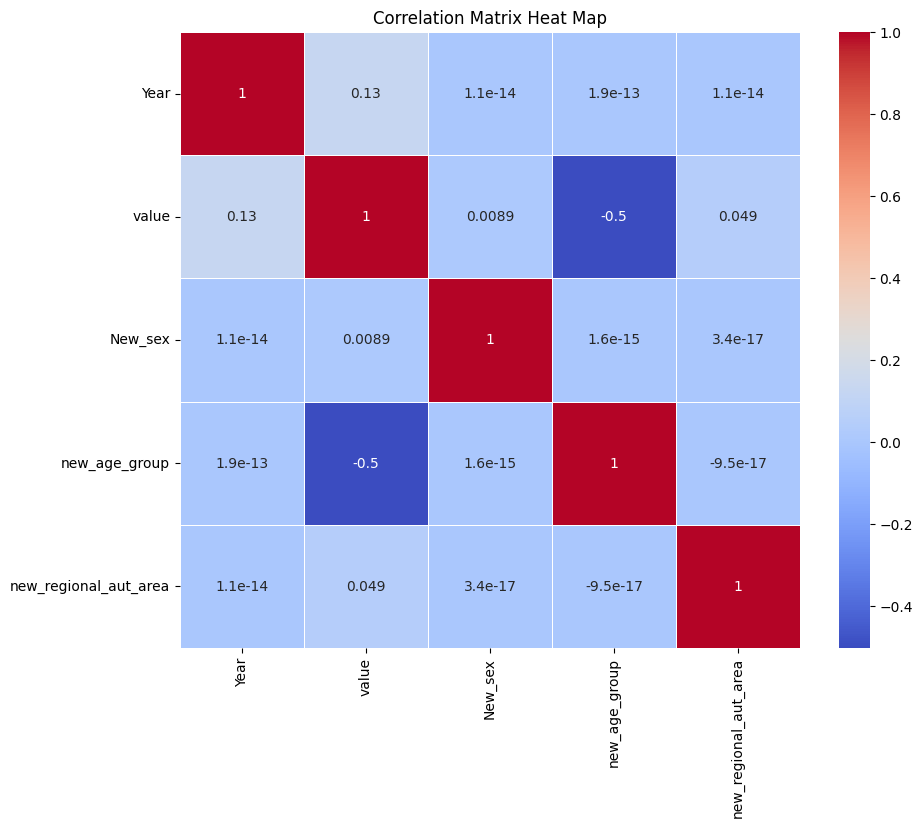

In [40]:
#Correlation Matrix
correlation_matrix = new_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()


## Discrete distribution

In [41]:
data.info

<bound method DataFrame.info of               age_group     Sex regional_aut_area  Year  value  New_sex  \
0           0 - 4 years    Male            Border  1996   11.9        0   
1           0 - 4 years    Male            Border  1997   13.9        0   
2           0 - 4 years    Male            Border  1998   14.1        0   
3           0 - 4 years    Male            Border  1999   14.5        0   
4           0 - 4 years    Male            Border  2000   15.2        0   
...                 ...     ...               ...   ...    ...      ...   
6331  85 years and over  Female        South-West  2013    6.3        1   
6332  85 years and over  Female        South-West  2014    6.5        1   
6333  85 years and over  Female        South-West  2015    6.7        1   
6334  85 years and over  Female        South-West  2016    6.8        1   
6335  85 years and over  Female        South-West  2017    6.9        1   

      new_age_group  new_regional_aut_area  
0                 0   

In [42]:
data.columns

Index(['age_group', 'Sex', 'regional_aut_area', 'Year', 'value', 'New_sex',
       'new_age_group', 'new_regional_aut_area'],
      dtype='object')

In [43]:
# Calculate the median (50th percentile)
median = data['value'].quantile(0.5)

# Calculate the 1st quartile (25th percentile)
q1 = data['value'].quantile(0.25)

# Calculate the 3rd quartile (75th percentile)
q3 = data['value'].quantile(0.75)

# You can calculate other quantiles similarly, by specifying the desired percentile as a decimal.

print("Median:", median)
print("1st Quartile (25th percentile):", q1)
print("3rd Quartile (75th percentile):", q3)

missing_values = data['value'].isnull().sum()
print("Number of missing values in 'VALUE' column:", missing_values)

Median: 13.2
1st Quartile (25th percentile): 7.8
3rd Quartile (75th percentile): 17.8
Number of missing values in 'VALUE' column: 0


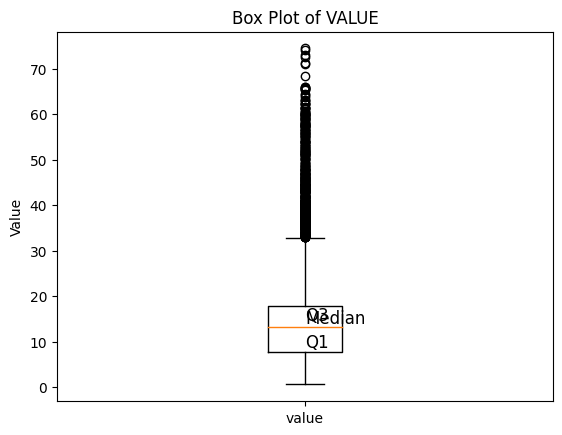

In [44]:
# Create a box plot for the 'VALUE' column
plt.boxplot(data['value'])

# Add labels to the quartiles
plt.text(1, q1, 'Q1', fontsize=12, verticalalignment='bottom')
plt.text(1, median, 'Median', fontsize=12, verticalalignment='bottom')
plt.text(1, q3, 'Q3', fontsize=12, verticalalignment='top')

# Customize the plot (optional)
plt.title('Box Plot of VALUE')
plt.ylabel('Value')
plt.xticks([1], ['value'])

# Show the plot
plt.show()


In [45]:
#clean outliners
# Calculate discrete values in column "VALUE"
Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers and create a new data frame
filtered_data = data[(data['value'] >= lower_bound) & (data['value'] <= upper_bound)]

# You can use it to save data with outliers removed
filtered_data.to_csv('new_eray_data.csv', index=False)

In [46]:
new_eray_data=pd.read_csv("new_eray_data.csv")
new_eray_data

,age_group,Sex,regional_aut_area,Year,value,New_sex,new_age_group,new_regional_aut_area
0,0 - 4 years,Male,Border,1996,11.9,0,0,0
1,0 - 4 years,Male,Border,1997,13.9,0,0,0
2,0 - 4 years,Male,Border,1998,14.1,0,0,0
3,0 - 4 years,Male,Border,1999,14.5,0,0,0
4,0 - 4 years,Male,Border,2000,15.2,0,0,0
...,...,...,...,...,...,...,...,...
5869,85 years and over,Female,South-West,2013,6.3,1,17,8
5870,85 years and over,Female,South-West,2014,6.5,1,17,8
5871,85 years and over,Female,South-West,2015,6.7,1,17,8
5872,85 years and over,Female,South-West,2016,6.8,1,17,8


In [47]:
new_eray_data.columns

Index(['age_group', 'Sex', 'regional_aut_area', 'Year', 'value', 'New_sex',
       'new_age_group', 'new_regional_aut_area'],
      dtype='object')

In [48]:
# Choose Using features
new_eray_data = new_eray_data[['New_sex','new_age_group', 'new_regional_aut_area','value','Year']]
new_eray_data

,New_sex,new_age_group,new_regional_aut_area,value,Year
0,0,0,0,11.9,1996
1,0,0,0,13.9,1997
2,0,0,0,14.1,1998
3,0,0,0,14.5,1999
4,0,0,0,15.2,2000
...,...,...,...,...,...
5869,1,17,8,6.3,2013
5870,1,17,8,6.5,2014
5871,1,17,8,6.7,2015
5872,1,17,8,6.8,2016


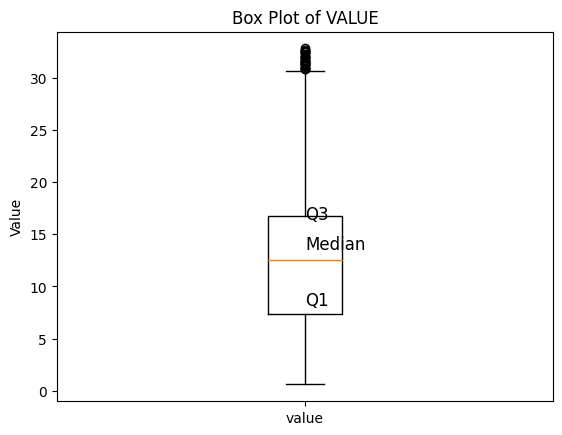

In [49]:
# Create a box plot for the 'VALUE' column
plt.boxplot(new_eray_data['value'])

# Add labels to the quartiles
plt.text(1, q1, 'Q1', fontsize=12, verticalalignment='bottom')
plt.text(1, median, 'Median', fontsize=12, verticalalignment='bottom')
plt.text(1, q3, 'Q3', fontsize=12, verticalalignment='top')

# Customize the plot (optional)
plt.title('Box Plot of VALUE')
plt.ylabel('Value')
plt.xticks([1], ['value'])

# Show the plot
plt.show()

In [50]:
#Separation of Train and Test dataset
# Dependent variable (y)
y = new_eray_data['value']

# Independent variables (X)
X = new_eray_data[['New_sex', 'new_age_group', 'new_regional_aut_area', 'Year']]

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of training and test sets
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (4699, 4) (4699,)
Test set size: (1175, 4) (1175,)


In [51]:
# Selection of dependent variable (y) and independent variables (X)
X = new_eray_data[['New_sex', 'new_age_group', 'new_regional_aut_area', 'Year']]  #Change arguments as appropriate
y = new_eray_data['value'] 

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print('Mean Square Error:', mse)
print('Coefficient of Determination (R^2):', r2)


Mean Square Error: 22.39827704049694
Coefficient of Determination (R^2): 0.42893263657664427


# Data for Machine Learning feature

Training Set Error (MSE): 21.488587389525154
Training Set R²: 0.451882418737808
Test Set Error (MSE): 22.9806362516981
Test Set R²: 0.4310291869208597


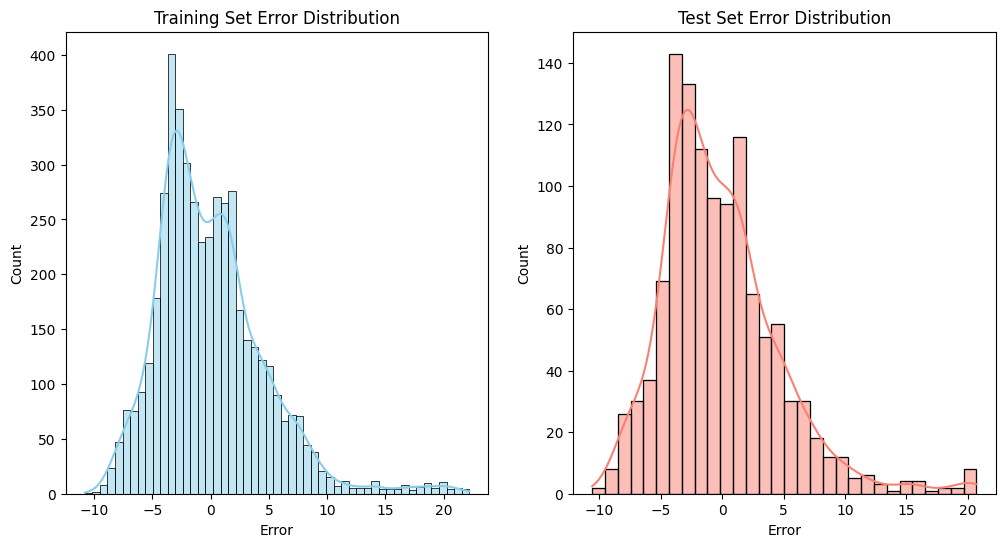

In [52]:
# Create linear regression model
# Dependent variable (y)
y = new_eray_data['value']

# Independent variables (X)
X = new_eray_data[['New_sex', 'new_age_group', 'new_regional_aut_area', 'Year']]

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Training set error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
print("Training Set Error (MSE):", train_mse)
print("Training Set R²:", r2_score(y_train, train_predictions))

# Test set error (MSE)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test Set Error (MSE):", test_mse)
print("Test Set R²:", r2_score(y_test, test_predictions))

# Get residuals (errors)
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

# Show error distribution for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color='skyblue')
plt.title('Training Set Error Distribution')
plt.xlabel('Error')

# Show error distribution for test set
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, color='salmon')
plt.title('Test Set Error Distribution')
plt.xlabel('Error')

plt.show()

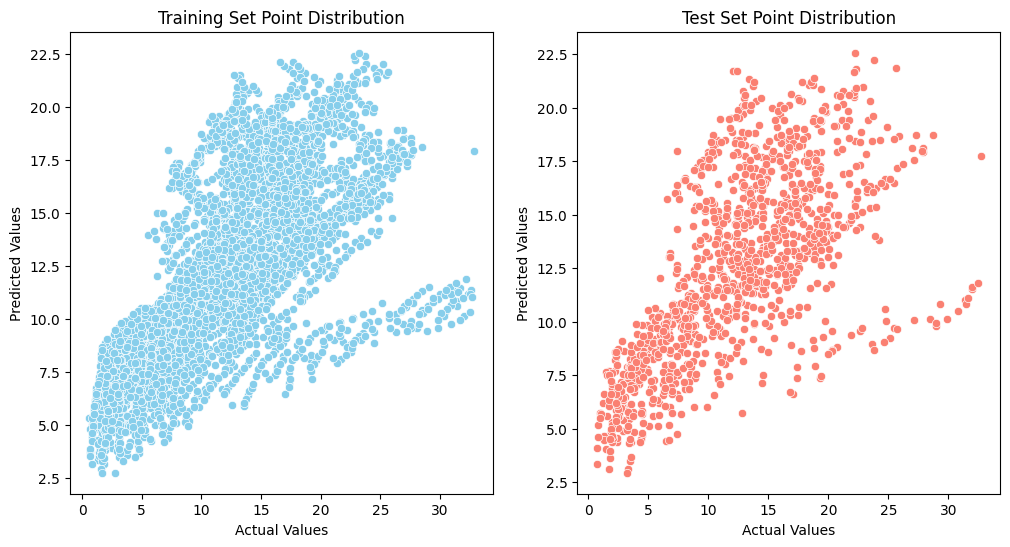

In [53]:
# Create linear regression model
#Create linear regression model point distribution
# Dependent variable (y)
y = new_eray_data['value']

# Independent variables (X)
X = new_eray_data[['New_sex', 'new_age_group', 'new_regional_aut_area', 'Year']]

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Create point scatter plot
plt.figure(figsize=(12, 6))

# For training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=train_predictions, color='skyblue')
plt.title('Training Set Point Distribution')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# For test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=test_predictions, color='salmon')
plt.title('Test Set Point Distribution')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

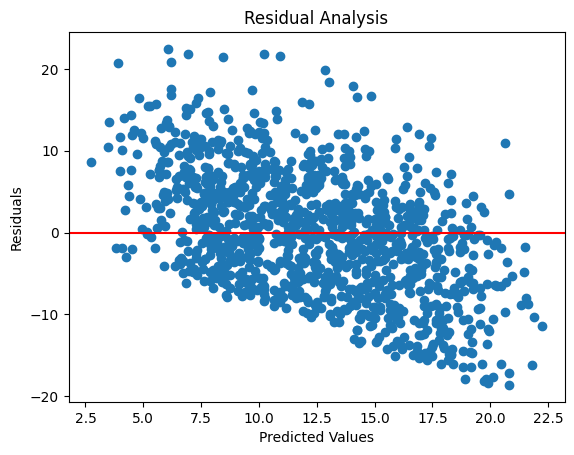

Residuals Mean: -0.01485242997918723
Residuals Standard Deviation: 7.3865151400490605


In [54]:
# Assuming y_test and y_pred are the actual and predicted values from the test set

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals to check for any patterns
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Alternatively, you can calculate descriptive statistics of the residuals
print("Residuals Mean:", residuals.mean())
print("Residuals Standard Deviation:", residuals.std())

## Linear Regression, Decision Trees and Random Forest¶

Linear Regression Results:
Mean Square Error: 22.39827704049694
Determination Coefficient (R^2): 0.42893263657664427


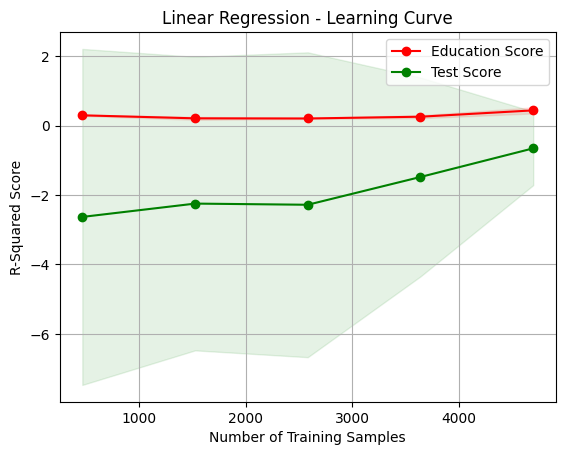

In [55]:
# Create Linear Regression model
# Selection of dependent variable (y) and independent variables (X)
X = new_eray_data[['New_sex', 'new_age_group', 'new_regional_aut_area', 'Year']]
y = new_eray_data['value']

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the performance of the model
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

# Print results
print('Linear Regression Results:')
print('Mean Square Error:', lr_mse)
print('Determination Coefficient (R^2):', lr_r2)

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                         n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
     plt.figure()
     plt.title(title)
     if ylim is not None:
         plt.ylim(*ylim)
     plt.xlabel("Number of Training Samples")
     plt.ylabel("R-Squared Score")
     train_sizes, train_scores, test_scores = learning_curve(
         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
     train_scores_mean = np.mean(train_scores, axis=1)
     train_scores_std = np.std(train_scores, axis=1)
     test_scores_mean = np.mean(test_scores, axis=1)
     test_scores_std = np.std(test_scores, axis=1)
     plt.grid()

     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Education Score")
     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Test Score")

     plt.legend(loc="best")
     return plt

# Plot the learning curve
plot_learning_curve(lr_model, "Linear Regression - Learning Curve", X, y, cv=5, n_jobs=-1)
plt.show()

Decision Tree Regressor Results:
Mean Square Error: 0.4995914893617021
Determination Coefficient (R^2): 0.9872623954912826


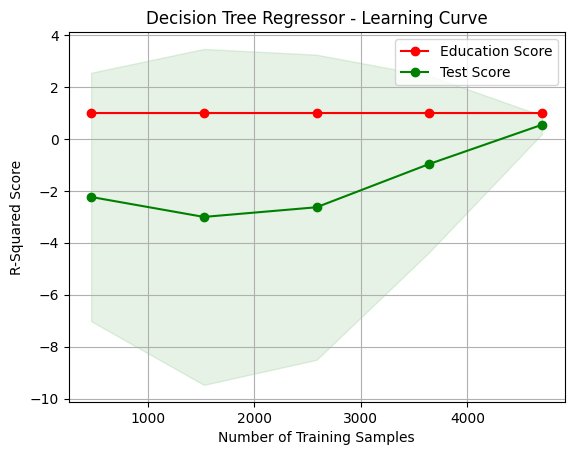

In [56]:
#Create the Decision Tree Regressor model
# Selection of dependent variable (y) and independent variables (X)
X = new_eray_data[['New_sex', 'new_age_group', 'new_regional_aut_area', 'Year']]
y = new_eray_data['value']

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=0)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the performance of the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

# Print results
print('Decision Tree Regressor Results:')
print('Mean Square Error:', dt_mse)
print('Determination Coefficient (R^2):', dt_r2)

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                         n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
     plt.figure()
     plt.title(title)
     if ylim is not None:
         plt.ylim(*ylim)
     plt.xlabel("Number of Training Samples")
     plt.ylabel("R-Squared Score")
     train_sizes, train_scores, test_scores = learning_curve(
         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
     train_scores_mean = np.mean(train_scores, axis=1)
     train_scores_std = np.std(train_scores, axis=1)
     test_scores_mean = np.mean(test_scores, axis=1)
     test_scores_std = np.std(test_scores, axis=1)
     plt.grid()

     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Education Score")
     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Test Score")

     plt.legend(loc="best")
     return plt

# Plot the learning curve
plot_learning_curve(dt_model, "Decision Tree Regressor - Learning Curve", X, y, cv=5, n_jobs=-1)
plt.show()

Random Forest Regressor Results:
Mean Square Error: 0.45108166808510586
Determination Coefficient (R^2): 0.9884992038264272


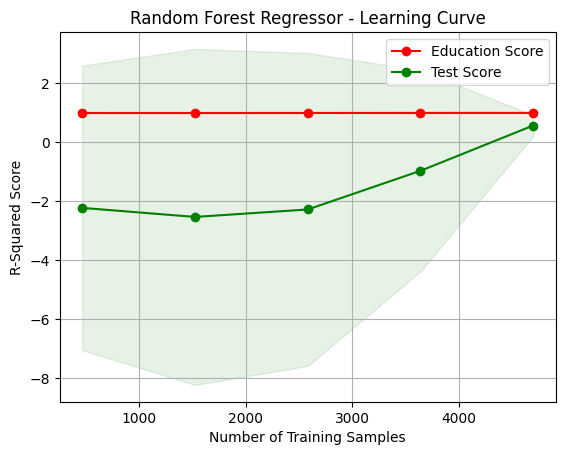

In [57]:
# Selection of dependent variable (y) and independent variables (X)
X = new_eray_data[['New_sex', 'new_age_group', 'new_regional_aut_area', 'Year']]
y = new_eray_data['value']

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Print results
print('Random Forest Regressor Results:')
print('Mean Square Error:', rf_mse)
print('Determination Coefficient (R^2):', rf_r2)

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                         n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
     plt.figure()
     plt.title(title)
     if ylim is not None:
         plt.ylim(*ylim)
     plt.xlabel("Number of Training Samples")
     plt.ylabel("R-Squared Score")
     train_sizes, train_scores, test_scores = learning_curve(
         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
     train_scores_mean = np.mean(train_scores, axis=1)
     train_scores_std = np.std(train_scores, axis=1)
     test_scores_mean = np.mean(test_scores, axis=1)
     test_scores_std = np.std(test_scores, axis=1)
     plt.grid()

     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Education Score")
     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Test Score")

     plt.legend(loc="best")
     return plt

# Plot the learning curve
plot_learning_curve(rf_model, "Random Forest Regressor - Learning Curve", X, y, cv=5, n_jobs=-1)
plt.show()